In [94]:
import numpy as np
import math

import matplotlib.pyplot as plt

import scipy.linalg as linalg

## [Problem 7-3]
> Implementation inverse matrix
- Note: $\det(scalar) = |scalar|$

### 역행렬 계산 알고리즘
1. 소행렬 (Minors matrix)
2. 격자 행렬 (Grid matrix)
3. 여인수 행렬(Cofactors matrix)
  - $여인수 행렬 = 소행렬 ⊙ 격자 행렬$
4. 수반행렬 (Adjugate matrix)
  - $(여인수 행렬)^T$
    - 원래 행렬의 det의 역수를 스칼라곱 했다는 건 뭔 말일까

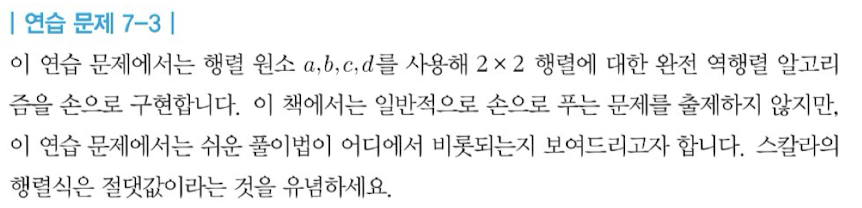

In [15]:
a, b, c, d, = 1, 2, 3, 4
X = np.array([[a, b],
              [c, d]])
X

array([[1, 2],
       [3, 4]])

In [30]:
# Minor Matrix
M = np.zeros((2, 2))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      M[i, j] = X[1-i, 1-j]

M

array([[4., 3.],
       [2., 1.]])

In [31]:
# Grid Matrix
G = np.zeros((2, 2))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      G[i, j] = (-1)**(i+1 + j+1)

G

array([[ 1., -1.],
       [-1.,  1.]])

In [32]:
# Cofactors matrix
C = M * G
C

array([[ 4., -3.],
       [-2.,  1.]])

In [33]:
# Adjugate matrix
A = C.T
A /= np.linalg.det(X)

A

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [34]:
X @ A

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [29]:
X @ np.linalg.inv(X)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## [Problem 7-4]

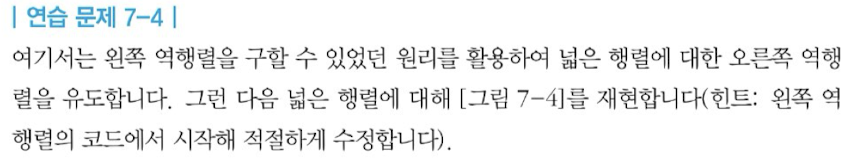

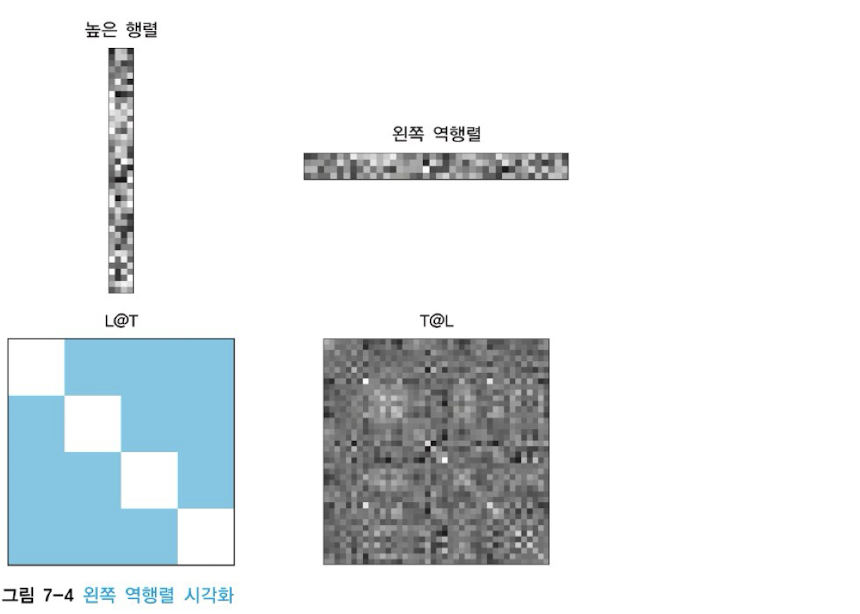

### Right inverse matrix 유도 및 구현

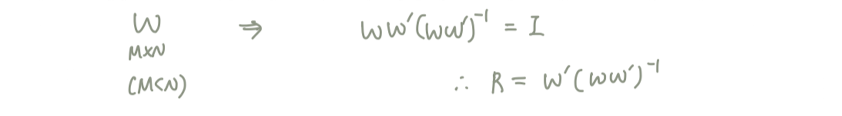

In [35]:
W = np.random.randn(5, 20)
W

array([[ 0.67870479, -1.85986384, -1.23417253, -0.50588393, -2.43752935,
         0.13640912, -0.57752168, -0.92869343, -0.58765651, -2.05079123,
        -1.33100673, -0.22443902,  1.23363635, -0.27657711,  0.11839152,
         0.71979433, -0.8913412 ,  0.21615043, -1.4619995 , -0.83999972],
       [ 0.28781164, -0.34170197, -1.24607897,  0.52163159, -0.07586712,
        -1.16134691,  1.17644325, -1.14324573,  0.31775192,  0.08189686,
        -0.78444843, -1.89350173,  0.35154967,  0.64680791, -0.95173494,
        -1.15740191,  0.08402517, -1.5299165 , -0.19953929, -0.45965883],
       [-0.87303509, -0.63502778, -0.00892293,  0.11593283, -0.42538392,
         0.40711406, -0.02948602, -0.34245556, -2.67779088,  1.18516139,
         0.35864436, -0.96290648, -1.88431956,  1.1763471 , -0.79735368,
         0.33486624,  0.63673643, -0.45024962,  2.75520368,  0.00755784],
       [-0.52079291,  0.93193067, -0.71564936,  0.66123632, -1.36725318,
        -0.94611945,  0.78356865, -0.64144887,  

In [37]:
R = W.T @ np.linalg.inv(W@W.T)
R

array([[-0.0134486 ,  0.02024467, -0.03917094, -0.02191786,  0.08166948],
       [-0.07567917,  0.00300514, -0.04348612,  0.04321466, -0.02129212],
       [-0.04233231, -0.07598635, -0.00849401, -0.05693436, -0.01070148],
       [-0.00250245,  0.03878797,  0.00233057,  0.03599189, -0.06018886],
       [-0.11916059,  0.01302056, -0.05035454, -0.09456238,  0.00178529],
       [ 0.02558127, -0.08811133,  0.02556481, -0.06457278, -0.02163646],
       [ 0.00025438,  0.08207967, -0.00528169,  0.0431705 , -0.09904247],
       [-0.01758057, -0.0726997 , -0.01601581, -0.05538907, -0.0563243 ],
       [-0.05159588,  0.05025529, -0.12023951,  0.07569663, -0.01038507],
       [-0.09877374,  0.02422159,  0.02188208,  0.01918367,  0.06396301],
       [-0.03512459, -0.04000519,  0.00804687,  0.02374217, -0.02825411],
       [ 0.00164029, -0.11132827, -0.03009203,  0.05614546,  0.00022436],
       [ 0.02928935,  0.01731809, -0.06988436, -0.04742518, -0.01046397],
       [-0.00104846,  0.03870669,  0.0

In [39]:
W@R

array([[ 1.00000000e+00, -2.39362736e-17,  3.21224015e-17,
         4.51621270e-17, -1.05724557e-16],
       [-4.58948639e-17,  1.00000000e+00,  1.29673381e-17,
        -2.11897296e-17, -2.13387343e-17],
       [ 5.74003823e-17,  2.39952005e-19,  1.00000000e+00,
         1.57421584e-17,  5.44749267e-17],
       [ 5.18105523e-18,  9.98510966e-17,  2.33468691e-18,
         1.00000000e+00, -1.21423752e-17],
       [-4.16333634e-17, -6.93889390e-17,  7.63278329e-17,
        -5.55111512e-17,  1.00000000e+00]])

### [그림 7-4] 재현

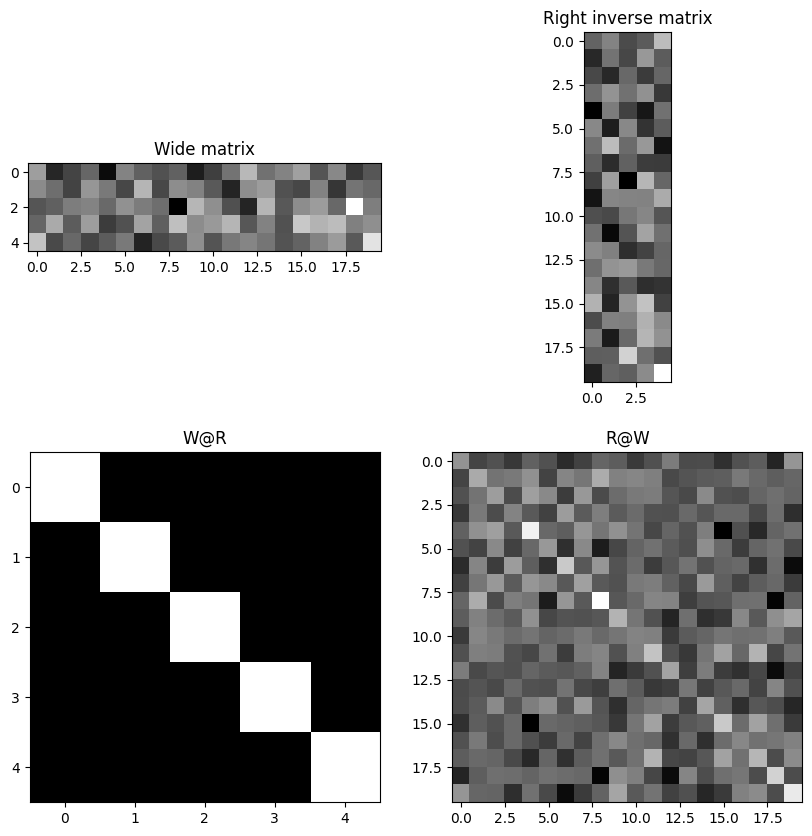

In [47]:
plt.figure(figsize=(10, 10))
plt.gray()

plt.subplot(2, 2, 1)
plt.title('Wide matrix')
plt.imshow(W)

plt.subplot(2, 2, 2)
plt.title('Right inverse matrix')
plt.imshow(R)

plt.subplot(2, 2, 3)
plt.title('W@R')
plt.imshow(W@R)

plt.subplot(2, 2, 4)
plt.title('R@W')
plt.imshow(R@W)

plt.show()

## [Problem 7-5]

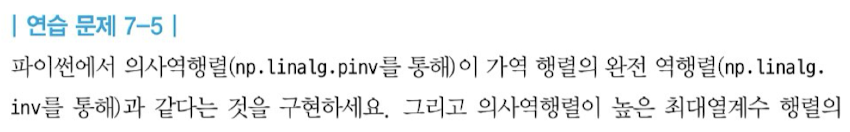
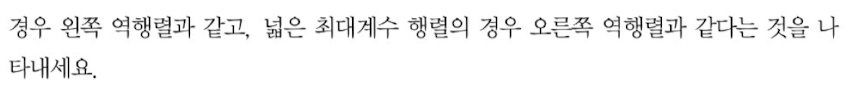

### [7-5-1]. Invertible matrix

In [48]:
mat_full = np.random.randn(10, 10)
mat_full

array([[ 0.73186045,  0.19199718, -1.62050054,  0.57965657, -0.18689804,
         0.01481933,  0.47071972, -0.48813733, -0.53277001, -1.20983802],
       [-0.49880629, -0.33711585,  1.58836366, -1.37503797,  1.16947619,
         0.8219463 , -1.21403031,  0.00451368, -0.26661808,  0.22099548],
       [-0.83399324, -0.12807102,  1.4026775 ,  0.80024417,  0.38197674,
        -1.39130513, -1.36052068, -0.89789464, -0.31028105, -0.08731558],
       [-0.17619822,  1.26696779, -0.51878725, -0.4600327 , -0.15185241,
        -0.7854259 , -2.49614015, -1.85087429, -1.15865039, -0.65458315],
       [ 0.89092369, -0.01111377,  0.75508815,  0.12994351,  0.58877742,
        -0.51820549, -0.42040725, -0.6003044 ,  1.58598922,  0.33907925],
       [ 0.46555661,  0.99404065,  0.42010568, -0.66239533,  0.49902125,
         1.22583367, -0.44397658,  0.20064693, -1.28558572, -1.90115134],
       [ 1.159666  ,  1.41387549,  1.51985965,  1.7126596 ,  0.01023819,
         1.0438635 , -0.18294688,  1.90382937

In [51]:
np.linalg.matrix_rank(mat_full) == mat_full.shape[0]

True

In [61]:
# MP-inverse
mat_full_pinv = np.linalg.pinv(mat_full)

# Inverse
mat_full_inv = np.linalg.inv(mat_full)

print('Full-rank matrix의 MP-inverse와 inverse는 같다.') if np.all(np.round(mat_full_pinv - mat_full_inv, 3)) < 1e-12 else print('다르다')

True

### [7-5-2]. Full column rank matrix

In [62]:
mat_full_col = np.random.randn(10, 5)
mat_full_col

array([[-2.11773997, -0.26387918, -0.26387302, -0.04607794, -0.3703847 ],
       [ 0.29140858, -0.5658021 , -0.81742347, -0.82257488,  1.1247932 ],
       [-1.01665805,  1.45228441, -0.29884952,  0.58285402, -0.79084167],
       [ 0.67443248, -1.59497668, -0.11577871, -1.12841909,  0.76999954],
       [ 0.24749734,  0.80672399,  2.66458179, -1.6261125 , -0.35610561],
       [ 0.52199838, -1.32799555, -0.05905574,  0.75066515, -0.41332729],
       [-0.25480551, -0.34334156, -0.28854795,  0.86526328,  0.60631885],
       [-0.35815387, -1.22543816, -0.05141842,  0.20070709, -0.13898147],
       [-0.89272444, -0.0941899 ,  0.56176216, -2.01982746, -1.28062257],
       [-0.77704629, -1.26753295, -0.63921094,  1.099562  , -1.74620232]])

In [63]:
np.linalg.matrix_rank(mat_full_col) == mat_full_col.shape[1]

True

In [66]:
# MP-inverse
mat_full_col_pinv = np.linalg.pinv(mat_full_col)

# Left-Inverse
mat_full_col_linv = np.linalg.inv(mat_full_col.T @ mat_full_col) @ mat_full_col.T

print('Full column rank matrix의 MP-inverse와 Left inverse는 같다.') if np.all(np.round(mat_full_col_pinv - mat_full_col_linv, 3)) < 1e-12 else print('다르다')

array([[-0.40923132, -0.00995001, -0.03987783,  0.02307109, -0.05714835,
         0.09313423, -0.16959341, -0.1205684 ,  0.00830896,  0.04285154],
       [-0.09377734, -0.00751097,  0.16266774, -0.1460465 , -0.04141611,
        -0.13659129, -0.07822598, -0.15987288,  0.0102073 , -0.10416408],
       [ 0.11969922, -0.17597967, -0.10451305, -0.02831108,  0.36249593,
         0.08476469,  0.15354031,  0.12941481, -0.15109241, -0.04406342],
       [ 0.03302065, -0.15407912,  0.00179808, -0.11761267,  0.03829108,
         0.09740063,  0.14795287,  0.06588531, -0.26427205,  0.0501473 ],
       [ 0.20504995,  0.10030568, -0.08679488,  0.06001207,  0.05194433,
        -0.08620557,  0.2096041 ,  0.072557  , -0.2169689 , -0.24984641]])

### [7-5-3]. Full row rank matrix

In [67]:
mat_full_row = np.random.randn(5, 10)
mat_full_row

array([[-0.25566856, -0.08041099, -0.46843257, -0.99188246,  1.12169085,
         0.06708184,  0.43188478,  1.19204219, -0.79692188, -0.98460145],
       [ 1.19938081, -0.14344145,  0.67054107,  1.811181  , -0.45276323,
        -0.93723499, -0.57451795,  0.59819183,  0.33813874,  0.20592031],
       [-0.34634385, -1.61392447, -0.21796444, -1.0447716 ,  0.97318559,
         1.53242133, -0.7819426 , -0.52124845, -1.51871907, -0.20628165],
       [-1.38271454, -0.67637785, -0.33532513, -0.65233268,  0.1550136 ,
        -1.2876112 ,  1.03210031,  0.21351159, -0.53988735,  0.02450631],
       [-1.63808729, -0.58984687,  0.77807459, -1.27973614,  1.13840931,
         0.58967513, -0.07651514, -2.91371681,  0.59049781,  1.32254524]])

In [70]:
np.linalg.matrix_rank(mat_full_row) == mat_full_row.shape[0]

True

In [71]:
# MP-inverse
mat_full_row_pinv = np.linalg.pinv(mat_full_row)

# Right-Inverse
mat_full_row_rinv = mat_full_row.T @ np.linalg.inv(mat_full_row @ mat_full_row.T)

print('Full row rank matrix의 MP-inverse와 Right inverse는 같다.') if np.all(np.round(mat_full_row_pinv - mat_full_row_rinv, 3)) < 1e-12 else print('다르다')

Full row rank matrix의 MP-inverse와 Right inverse는 같다.


## [Problem 7-9]

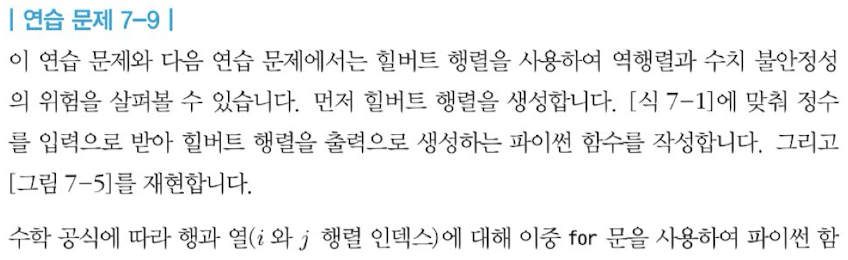
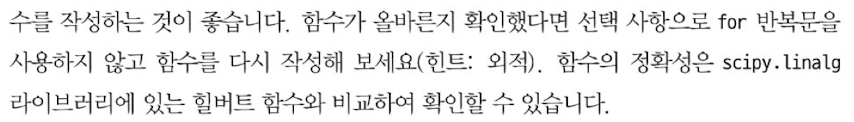

### [7-9-1]. Generate Hilbert Matrix
> [식 7-1]에 맞춰, 정수를 입력으로 받아, 힐버트 행렬을 출력으로 생성하는 함수 정의
> - 이중 for loop을 사용 (그 다음, for loop 없이 해보기 `Hint: outer product`

#### [식 7-1]: $$h_{i,j} = \frac{1}{i+j-1}$$

In [86]:
# Ver 1: 이중 for Loop
def gen_hilbert(dim):
  H = np.zeros((dim, dim))
  for i in range(dim):
    for j in range(dim):
        H[i, j] = 1/((i+1)+(j+1)-1)

  return(H)

H = gen_hilbert(3)
H

array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.33333333, 0.25      , 0.2       ]])

In [85]:
# Ver 2: np.outer

U = np.array([1, 2, 3, 4, 5])
outer_sum = np.add.outer(U, U) - 1

H = 1/outer_sum
H

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

In [95]:
# 함수 정확성 점검
linalg.hilbert(5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

### [7-9-2]. [그림 7-5] 재현

In [88]:
# Hilbert
H5 = gen_hilbert(5)

# Hilbert inverse
H5_inv = np.linalg.inv(H5)

array([[ 2.500e+01, -3.000e+02,  1.050e+03, -1.400e+03,  6.300e+02],
       [-3.000e+02,  4.800e+03, -1.890e+04,  2.688e+04, -1.260e+04],
       [ 1.050e+03, -1.890e+04,  7.938e+04, -1.176e+05,  5.670e+04],
       [-1.400e+03,  2.688e+04, -1.176e+05,  1.792e+05, -8.820e+04],
       [ 6.300e+02, -1.260e+04,  5.670e+04, -8.820e+04,  4.410e+04]])

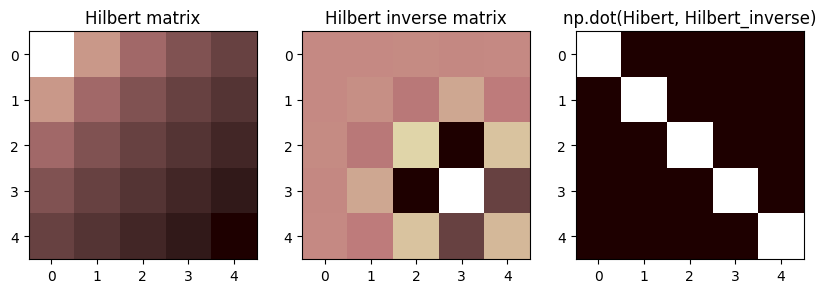

In [93]:
plt.figure(figsize=(10, 10))
plt.pink()

plt.subplot(1, 3, 1)
plt.title('Hilbert matrix')
plt.imshow(H5)

plt.subplot(1, 3, 2)
plt.title('Hilbert inverse matrix')
plt.imshow(H5_inv)

plt.subplot(1, 3, 3)
plt.title('np.dot(Hibert, Hilbert_inverse)')
plt.imshow(H5@H5_inv)


plt.show()

## [Problem 7-10]

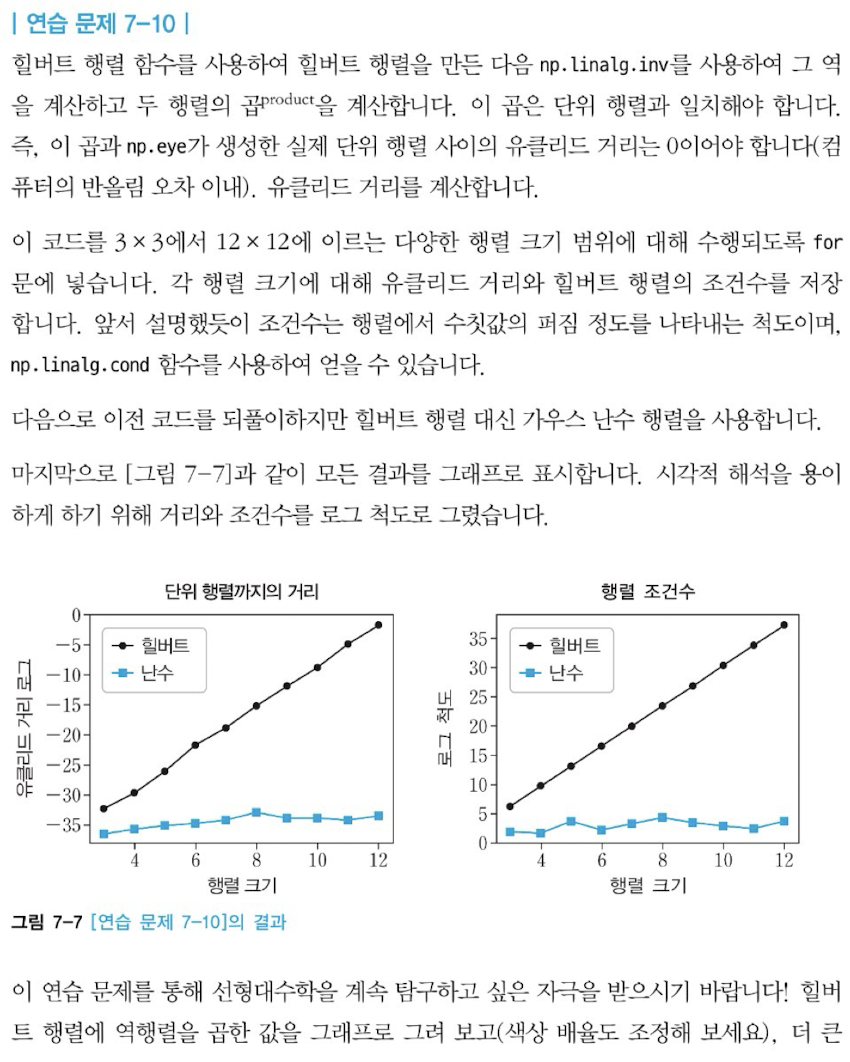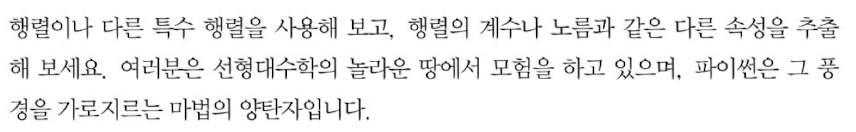

### [7-10-1]. Hilbert Matrix

In [103]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[3, 2],
              [5, 4]])

np.sum((A - B)**2)

8

In [104]:
l_i = []
l_euclid = []
l_cond   = []


for i in range(3, 13):
  H = gen_hilbert(i)
  H_inv = np.linalg.inv(H)

  l_i.append(i)

  # 유클리드 거리 계산
  l_euclid.append(np.sum((H@H_inv - np.eye(i))**2))

  # 행렬 조건수 계산
  l_cond.append(np.linalg.cond(H))

# print(l_i, l_euclid, l_cond)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [8.787718747136508e-29, 1.4493965985321683e-25, 1.1147986950953563e-22, 6.853747159091765e-20, 6.787569912751581e-17, 6.17497799533823e-14, 2.4299873637799576e-11, 2.4494988125746883e-08, 3.375409807197633e-05, 0.04723884733840819] [524.0567775860644, 15513.73873892924, 476607.2502425855, 14951058.642254734, 475367356.7446793, 15257575538.060041, 493153755941.02344, 16024416987428.36, 522270131654983.3, 1.7515952300879806e+16]


### [7-10-2]. Gaussian Random Matrix

In [116]:
l_euclid_2 = []
l_cond_2   = []


for i in range(3, 13):
  G = np.random.randn(i, i)
  G_inv = np.linalg.inv(G)

  # 유클리드 거리 계산
  l_euclid_2.append(np.sum((G@G_inv - np.eye(i))**2))

  # 행렬 조건수 계산
  l_cond_2.append(np.linalg.cond(G))

array([[-7.28310607e-01, -1.66897307e-01,  8.48742004e-01,
        -1.62333988e+00, -1.21726954e+00, -1.60814980e-01,
         7.19773656e-01,  8.00532809e-01, -1.37192429e+00,
        -1.08162238e-01, -1.20590672e+00,  3.34391291e-01],
       [ 2.30486061e+00,  2.38803018e-01,  6.32449060e-01,
        -3.13384993e-01,  3.66520900e-01, -8.31980366e-01,
        -6.55942148e-01,  5.82808502e-01,  1.46716211e+00,
        -1.70044181e-02,  9.71143389e-04, -1.95907354e+00],
       [-1.11909638e+00, -3.67157678e-01, -1.08652428e+00,
        -6.46168854e-02, -5.17801322e-01, -1.13719010e-01,
         8.14497479e-02,  4.50284187e-01, -5.83488247e-01,
         8.62941525e-02, -8.49415826e-01,  9.88508553e-01],
       [-1.67360351e+00,  2.48815092e-01, -6.73747772e-01,
        -4.76818486e-01, -5.19145078e-02, -1.66582487e-01,
         1.29081602e+00, -5.23621863e-01, -1.68528344e+00,
        -2.36474709e-01,  8.65475275e-01, -1.63500555e+00],
       [ 2.68061606e-02, -5.29462307e-01,  8.6331068

### [7-10-3]. Visualization

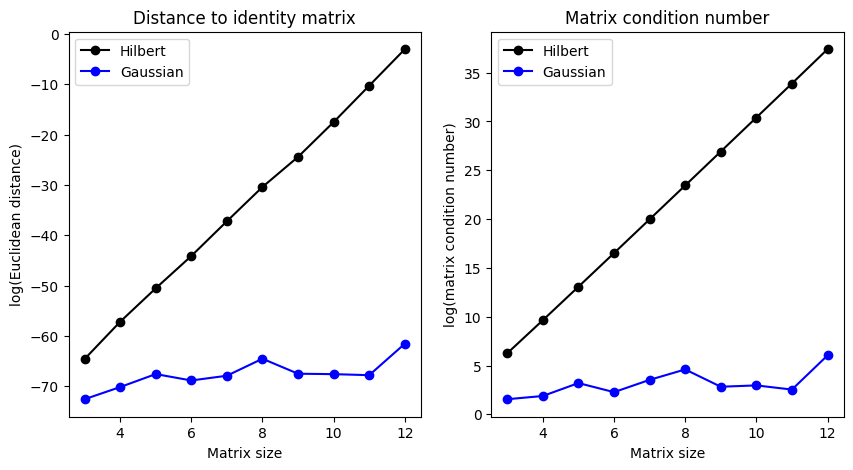

In [120]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Hilbert
plt.plot(l_i, np.log(l_euclid), 'ko-', label = 'Hilbert')
plt.title("Distance to identity matrix")
plt.xlabel("Matrix size")
plt.ylabel("log(Euclidean distance)")

# Gaussian
plt.plot(l_i, np.log(l_euclid_2), 'bo-', label = 'Gaussian')

plt.legend()


plt.subplot(1, 2, 2)
# Hilbert
plt.plot(l_i, np.log(l_cond), 'ko-', label = 'Hilbert')
plt.title("Matrix condition number")
plt.xlabel("Matrix size")
plt.ylabel("log(matrix condition number)")

# Gaussian
plt.plot(l_i, np.log(l_cond_2), 'bo-', label = 'Gaussian')

plt.legend()

plt.show()